# Neural Network

<img src="images/nn.jpg" alt="Drawing" style="width: 700px;"/>

In [6]:
import numpy as np
np.random.seed(90)

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor

%matplotlib inline


In [28]:
from chemml.datasets import load_organic_density
smiles, density, features = load_organic_density()

X = features.values
y = density.values.reshape(-1)

/anaconda2/envs/chemml_dev/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda2/envs/chemml_dev/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda2/envs/chemml_dev/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


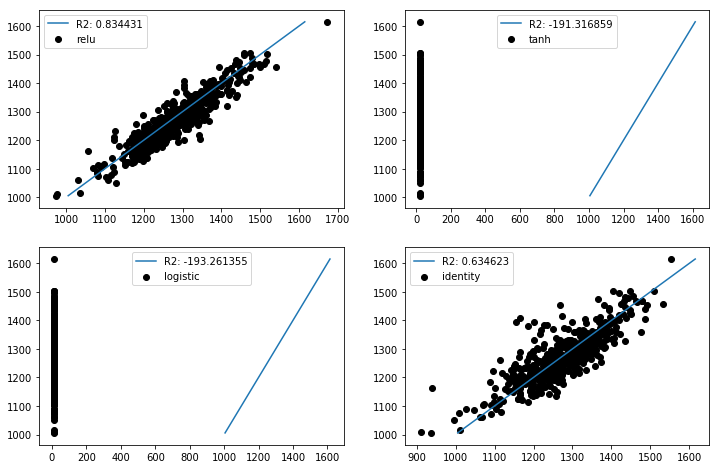

In [38]:
max_iter = 500

mlpr = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'relu', max_iter=max_iter)
mlpr.fit(X,y)

mlpt = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'tanh', max_iter=max_iter)
mlpt.fit(X,y)

mlpl = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'logistic', max_iter=max_iter)
mlpl.fit(X,y)

mlpi = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'identity', max_iter=max_iter)
mlpi.fit(X,y)


# plot the fitted lines
fig = plt.figure(figsize=[12,8])
plt.subplot(2,2,1)
min_y = min(y)
max_y = max(y)
plt.plot([min_y,max_y],[min_y,max_y], label='R2: %f'%mlpr.score(X,y))
plt.scatter(mlpr.predict(X),y, c='k', label='relu')
plt.legend()
plt.subplot(2,2,2)
plt.plot([min_y,max_y],[min_y,max_y], label='R2: %f'%mlpt.score(X,y))
plt.scatter(mlpt.predict(X),y, c='k', label='tanh')
plt.legend()
plt.subplot(2,2,3)
plt.plot([min_y,max_y],[min_y,max_y], label='R2: %f'%mlpl.score(X,y))
plt.scatter(mlpl.predict(X),y, c='k', label='logistic')
plt.legend()
plt.subplot(2,2,4)
plt.plot([min_y,max_y],[min_y,max_y], label='R2: %f'%mlpi.score(X,y))
plt.scatter(mlpi.predict(X),y, c='k', label='identity')
plt.legend()




In [18]:
print ('# negative X:', (X<0).any().sum())
print ('maximum min of all features:', X.min().max())


# negative X: 1
maximum min of all features: -0.003


In [19]:
(y<0).any().sum()


0

## Activation functions
A list of activation functions:
https://en.wikipedia.org/wiki/Activation_function

- range of inputs and outputs
- derivative at different input values

## Impact of normalizing data 

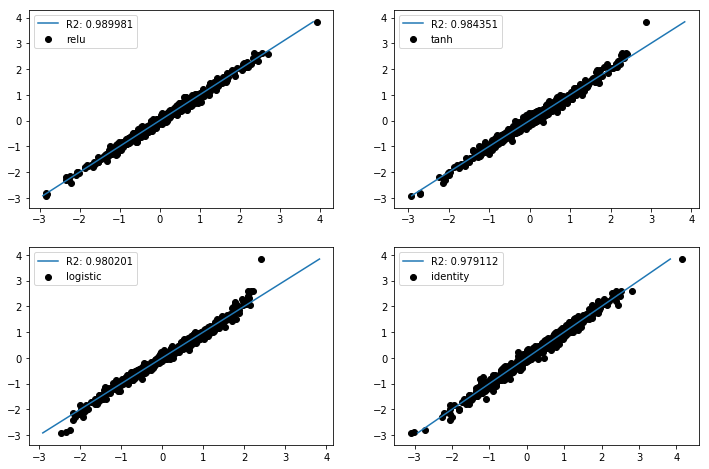

In [37]:
from sklearn import preprocessing

scalerSS = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
Xscaled = scalerSS.fit_transform(X)
yscaled = scalerSS.fit_transform(y.reshape(-1,1)).reshape(-1)

max_iter= 500

# define and fit models
mlpr = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'relu', max_iter=max_iter)
mlpr.fit(Xscaled,yscaled)

mlpt = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'tanh', max_iter=max_iter)
mlpt.fit(Xscaled,yscaled)

mlpl = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'logistic', max_iter=max_iter)
mlpl.fit(Xscaled,yscaled)

mlpi = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'identity', max_iter=max_iter)
mlpi.fit(Xscaled,yscaled)

# plot the fitted lines
fig = plt.figure(figsize=[12,8])
min_y = min(yscaled)
max_y = max(yscaled)

plt.subplot(2,2,1)
plt.plot([min_y,max_y],[min_y,max_y], label='R2: %f'%mlpr.score(Xscaled,yscaled))
plt.scatter(mlpr.predict(Xscaled),yscaled, c='k', label='relu')
plt.legend()

plt.subplot(2,2,2)
plt.plot([min_y,max_y],[min_y,max_y], label='R2: %f'%mlpt.score(Xscaled,yscaled))
plt.scatter(mlpt.predict(Xscaled),yscaled, c='k', label='tanh')
plt.legend()

plt.subplot(2,2,3)
plt.plot([min_y,max_y],[min_y,max_y], label='R2: %f'%mlpl.score(Xscaled,yscaled))
plt.scatter(mlpl.predict(Xscaled),yscaled, c='k', label='logistic')
plt.legend()

plt.subplot(2,2,4)
plt.plot([min_y,max_y],[min_y,max_y], label='R2: %f'%mlpi.score(Xscaled,yscaled))
plt.scatter(mlpi.predict(Xscaled),yscaled, c='k', label='identity')
plt.legend()



/anaconda2/envs/chemml_dev/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda2/envs/chemml_dev/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda2/envs/chemml_dev/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda2/envs/chemml_dev/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization h

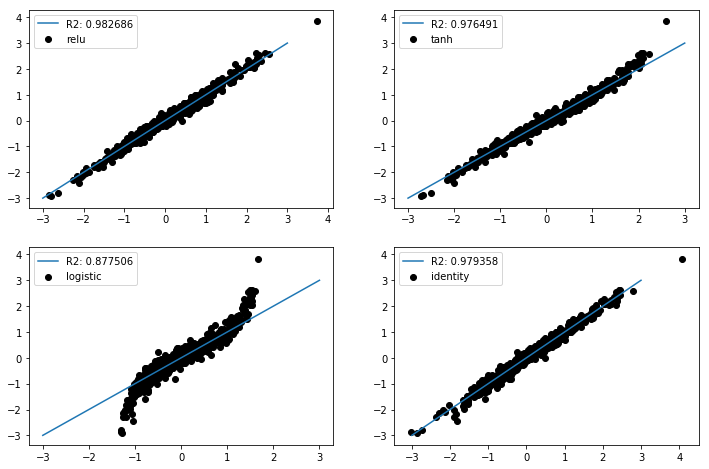

In [35]:
from sklearn import preprocessing

scalerSS = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
Xscaled = scalerSS.fit_transform(X)
yscaled = scalerSS.fit_transform(y.reshape(-1,1)).reshape(-1)



mlpr = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'relu', alpha = 3)
mlpr.fit(Xscaled,yscaled)

mlpt = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'tanh', alpha = 3)
mlpt.fit(Xscaled,yscaled)

mlpl = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'logistic', alpha = 3)
mlpl.fit(Xscaled,yscaled)

mlpi = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'identity', alpha = 3)
mlpi.fit(Xscaled,yscaled)


# plot the fitted lines
fig = plt.figure(figsize=[12,8])
plt.subplot(2,2,1)
plt.plot([-3,3],[-3,3], label='R2: %f'%mlpr.score(Xscaled,yscaled))
plt.scatter(mlpr.predict(Xscaled),yscaled, c='k', label='relu')
plt.legend()
plt.subplot(2,2,2)
plt.plot([-3,3],[-3,3], label='R2: %f'%mlpt.score(Xscaled,yscaled))
plt.scatter(mlpt.predict(Xscaled),yscaled, c='k', label='tanh')
plt.legend()
plt.subplot(2,2,3)
plt.plot([-3,3],[-3,3], label='R2: %f'%mlpl.score(Xscaled,yscaled))
plt.scatter(mlpl.predict(Xscaled),yscaled, c='k', label='logistic')
plt.legend()
plt.subplot(2,2,4)
plt.plot([-3,3],[-3,3], label='R2: %f'%mlpi.score(Xscaled,yscaled))
plt.scatter(mlpi.predict(Xscaled),yscaled, c='k', label='identity')
plt.legend()

## Early stopping

In [41]:
mlpr = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'relu', alpha = 1, max_iter=500, verbose = 1)
mlpr.fit(Xscaled,yscaled)

print (mlpr.score(Xscaled,yscaled))



Iteration 1, loss = 0.63288872
Iteration 2, loss = 0.47971549
Iteration 3, loss = 0.39033020
Iteration 4, loss = 0.33149401
Iteration 5, loss = 0.29424978
Iteration 6, loss = 0.26982578
Iteration 7, loss = 0.25190288
Iteration 8, loss = 0.24044324
Iteration 9, loss = 0.23033682
Iteration 10, loss = 0.22272642
Iteration 11, loss = 0.21661677
Iteration 12, loss = 0.21039122
Iteration 13, loss = 0.20369060
Iteration 14, loss = 0.19804150
Iteration 15, loss = 0.19257674
Iteration 16, loss = 0.18777592
Iteration 17, loss = 0.18351425
Iteration 18, loss = 0.17964697
Iteration 19, loss = 0.17611881
Iteration 20, loss = 0.17343451
Iteration 21, loss = 0.17070028
Iteration 22, loss = 0.16842394
Iteration 23, loss = 0.16592657
Iteration 24, loss = 0.16389182
Iteration 25, loss = 0.16181628
Iteration 26, loss = 0.15997004
Iteration 27, loss = 0.15818558
Iteration 28, loss = 0.15636663
Iteration 29, loss = 0.15446500
Iteration 30, loss = 0.15307258
Iteration 31, loss = 0.15153420
Iteration 32, los

Iteration 338, loss = 0.02250158
Iteration 339, loss = 0.02243984
Iteration 340, loss = 0.02232936
Iteration 341, loss = 0.02249566
Iteration 342, loss = 0.02256274
Iteration 343, loss = 0.02225570
Iteration 344, loss = 0.02227155
Iteration 345, loss = 0.02203945
Iteration 346, loss = 0.02191744
Iteration 347, loss = 0.02188716
Iteration 348, loss = 0.02175941
Iteration 349, loss = 0.02176828
Iteration 350, loss = 0.02200393
Iteration 351, loss = 0.02172238
Iteration 352, loss = 0.02178014
Iteration 353, loss = 0.02172681
Iteration 354, loss = 0.02153187
Iteration 355, loss = 0.02160075
Iteration 356, loss = 0.02135672
Iteration 357, loss = 0.02147251
Iteration 358, loss = 0.02144286
Iteration 359, loss = 0.02180538
Iteration 360, loss = 0.02185707
Iteration 361, loss = 0.02118517
Iteration 362, loss = 0.02113076
Iteration 363, loss = 0.02085634
Iteration 364, loss = 0.02087461
Iteration 365, loss = 0.02089027
Iteration 366, loss = 0.02094216
Iteration 367, loss = 0.02083917
Iteration 

In [42]:
# with early_stopping
mlpr = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'relu', alpha = 1, verbose = 1, early_stopping=True)
mlpr.fit(Xscaled,yscaled)

print (mlpr.score(Xscaled,yscaled))




Iteration 1, loss = 1.04089375
Validation score: -0.308840
Iteration 2, loss = 0.81588296
Validation score: -0.148557
Iteration 3, loss = 0.67142634
Validation score: 0.172936
Iteration 4, loss = 0.54824758
Validation score: 0.259347
Iteration 5, loss = 0.48351760
Validation score: 0.394600
Iteration 6, loss = 0.41044181
Validation score: 0.479609
Iteration 7, loss = 0.36434673
Validation score: 0.547672
Iteration 8, loss = 0.32112223
Validation score: 0.617166
Iteration 9, loss = 0.29215671
Validation score: 0.641214
Iteration 10, loss = 0.28242853
Validation score: 0.683070
Iteration 11, loss = 0.26416010
Validation score: 0.706691
Iteration 12, loss = 0.25346170
Validation score: 0.702645
Iteration 13, loss = 0.24670001
Validation score: 0.724315
Iteration 14, loss = 0.23843352
Validation score: 0.742904
Iteration 15, loss = 0.23570106
Validation score: 0.754695
Iteration 16, loss = 0.22933449
Validation score: 0.760830
Iteration 17, loss = 0.22581534
Validation score: 0.767679
Iter

Iteration 145, loss = 0.09613222
Validation score: 0.947788
Iteration 146, loss = 0.09569170
Validation score: 0.950169
Iteration 147, loss = 0.09504048
Validation score: 0.949932
Iteration 148, loss = 0.09452265
Validation score: 0.950364
Iteration 149, loss = 0.09399470
Validation score: 0.949898
Iteration 150, loss = 0.09355036
Validation score: 0.949940
Iteration 151, loss = 0.09302040
Validation score: 0.949533
Iteration 152, loss = 0.09252101
Validation score: 0.953211
Iteration 153, loss = 0.09224041
Validation score: 0.952754
Iteration 154, loss = 0.09153393
Validation score: 0.950157
Iteration 155, loss = 0.09109067
Validation score: 0.952213
Iteration 156, loss = 0.09062296
Validation score: 0.948913
Iteration 157, loss = 0.09032898
Validation score: 0.951965
Iteration 158, loss = 0.08990739
Validation score: 0.953193
Iteration 159, loss = 0.08929693
Validation score: 0.949257
Iteration 160, loss = 0.08885321
Validation score: 0.954600
Iteration 161, loss = 0.08845838
Validat